# Prepare a model for glass classification using KNN

## Data Description:

- RI : refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- AI: Aluminum
- Si: Silicon
- K:Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

Type: Type of glass: (class attribute)
 * 1 : building_windows_float_processed
 * 2 : building_windows_non_float_processed
 * 3 : vehicle_windows_float_processed
 * 4 : vehicle_windows_non_float_processed (none in this database)
 * 5 : containers
 * 6 : tableware
 * 7 : headlamps

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
gs = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_13_KNN/Dataset/glass.csv')

gs

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
gs_nrow = gs.shape[0]

In [4]:
def lost_record():

    gs_nrow_now = gs.shape[0]
    lost = gs_nrow - gs_nrow_now
    lost = (lost/gs_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [5]:
gs.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
gs.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [9]:
uni(gs)


 All Unique Value in RI
[1.51115 1.51131 1.51215 1.51299 1.51316 1.51321 1.51409 1.51508 1.51514
 1.51531 1.51545 1.51556 1.51567 1.51569 1.51571 1.51574 1.51588 1.51589
 1.5159  1.51592 1.51593 1.51594 1.51596 1.51602 1.51605 1.51609 1.5161
 1.51613 1.51617 1.51618 1.51623 1.51625 1.51627 1.51629 1.51631 1.5164
 1.51643 1.51645 1.51646 1.51651 1.51652 1.51653 1.51655 1.51658 1.5166
 1.51662 1.51663 1.51665 1.51666 1.51667 1.5167  1.51673 1.51674 1.51683
 1.51685 1.51687 1.51689 1.5169  1.51694 1.51707 1.51708 1.51709 1.51711
 1.51719 1.5172  1.51721 1.51727 1.5173  1.51732 1.51735 1.51736 1.51742
 1.51743 1.51747 1.51748 1.5175  1.51751 1.51753 1.51754 1.51755 1.51756
 1.51761 1.51763 1.51764 1.51766 1.51768 1.51769 1.51775 1.51776 1.51778
 1.51779 1.51783 1.51784 1.51786 1.51789 1.51793 1.51796 1.51797 1.518
 1.51806 1.51808 1.51811 1.51813 1.51818 1.5182  1.51824 1.51829 1.51831
 1.51832 1.51837 1.51838 1.51839 1.51841 1.51844 1.51846 1.51847 1.51848
 1.51851 1.51852 1.5186  1.5186

### Checking for Duplicated Values

In [10]:
gs[gs.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [12]:
gs.drop_duplicates(inplace = True)

In [13]:
gs[gs.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

In [22]:
def plot_box(df,r,c):
    r = int(r)
    c = int(c)
    fig,ax = plt.subplots(r,c)
    plt.tight_layout()

    for i in range(r):
        for j in range(c):
            sns.boxplot(df[df.columns[i+j]], ax = ax[i,j])

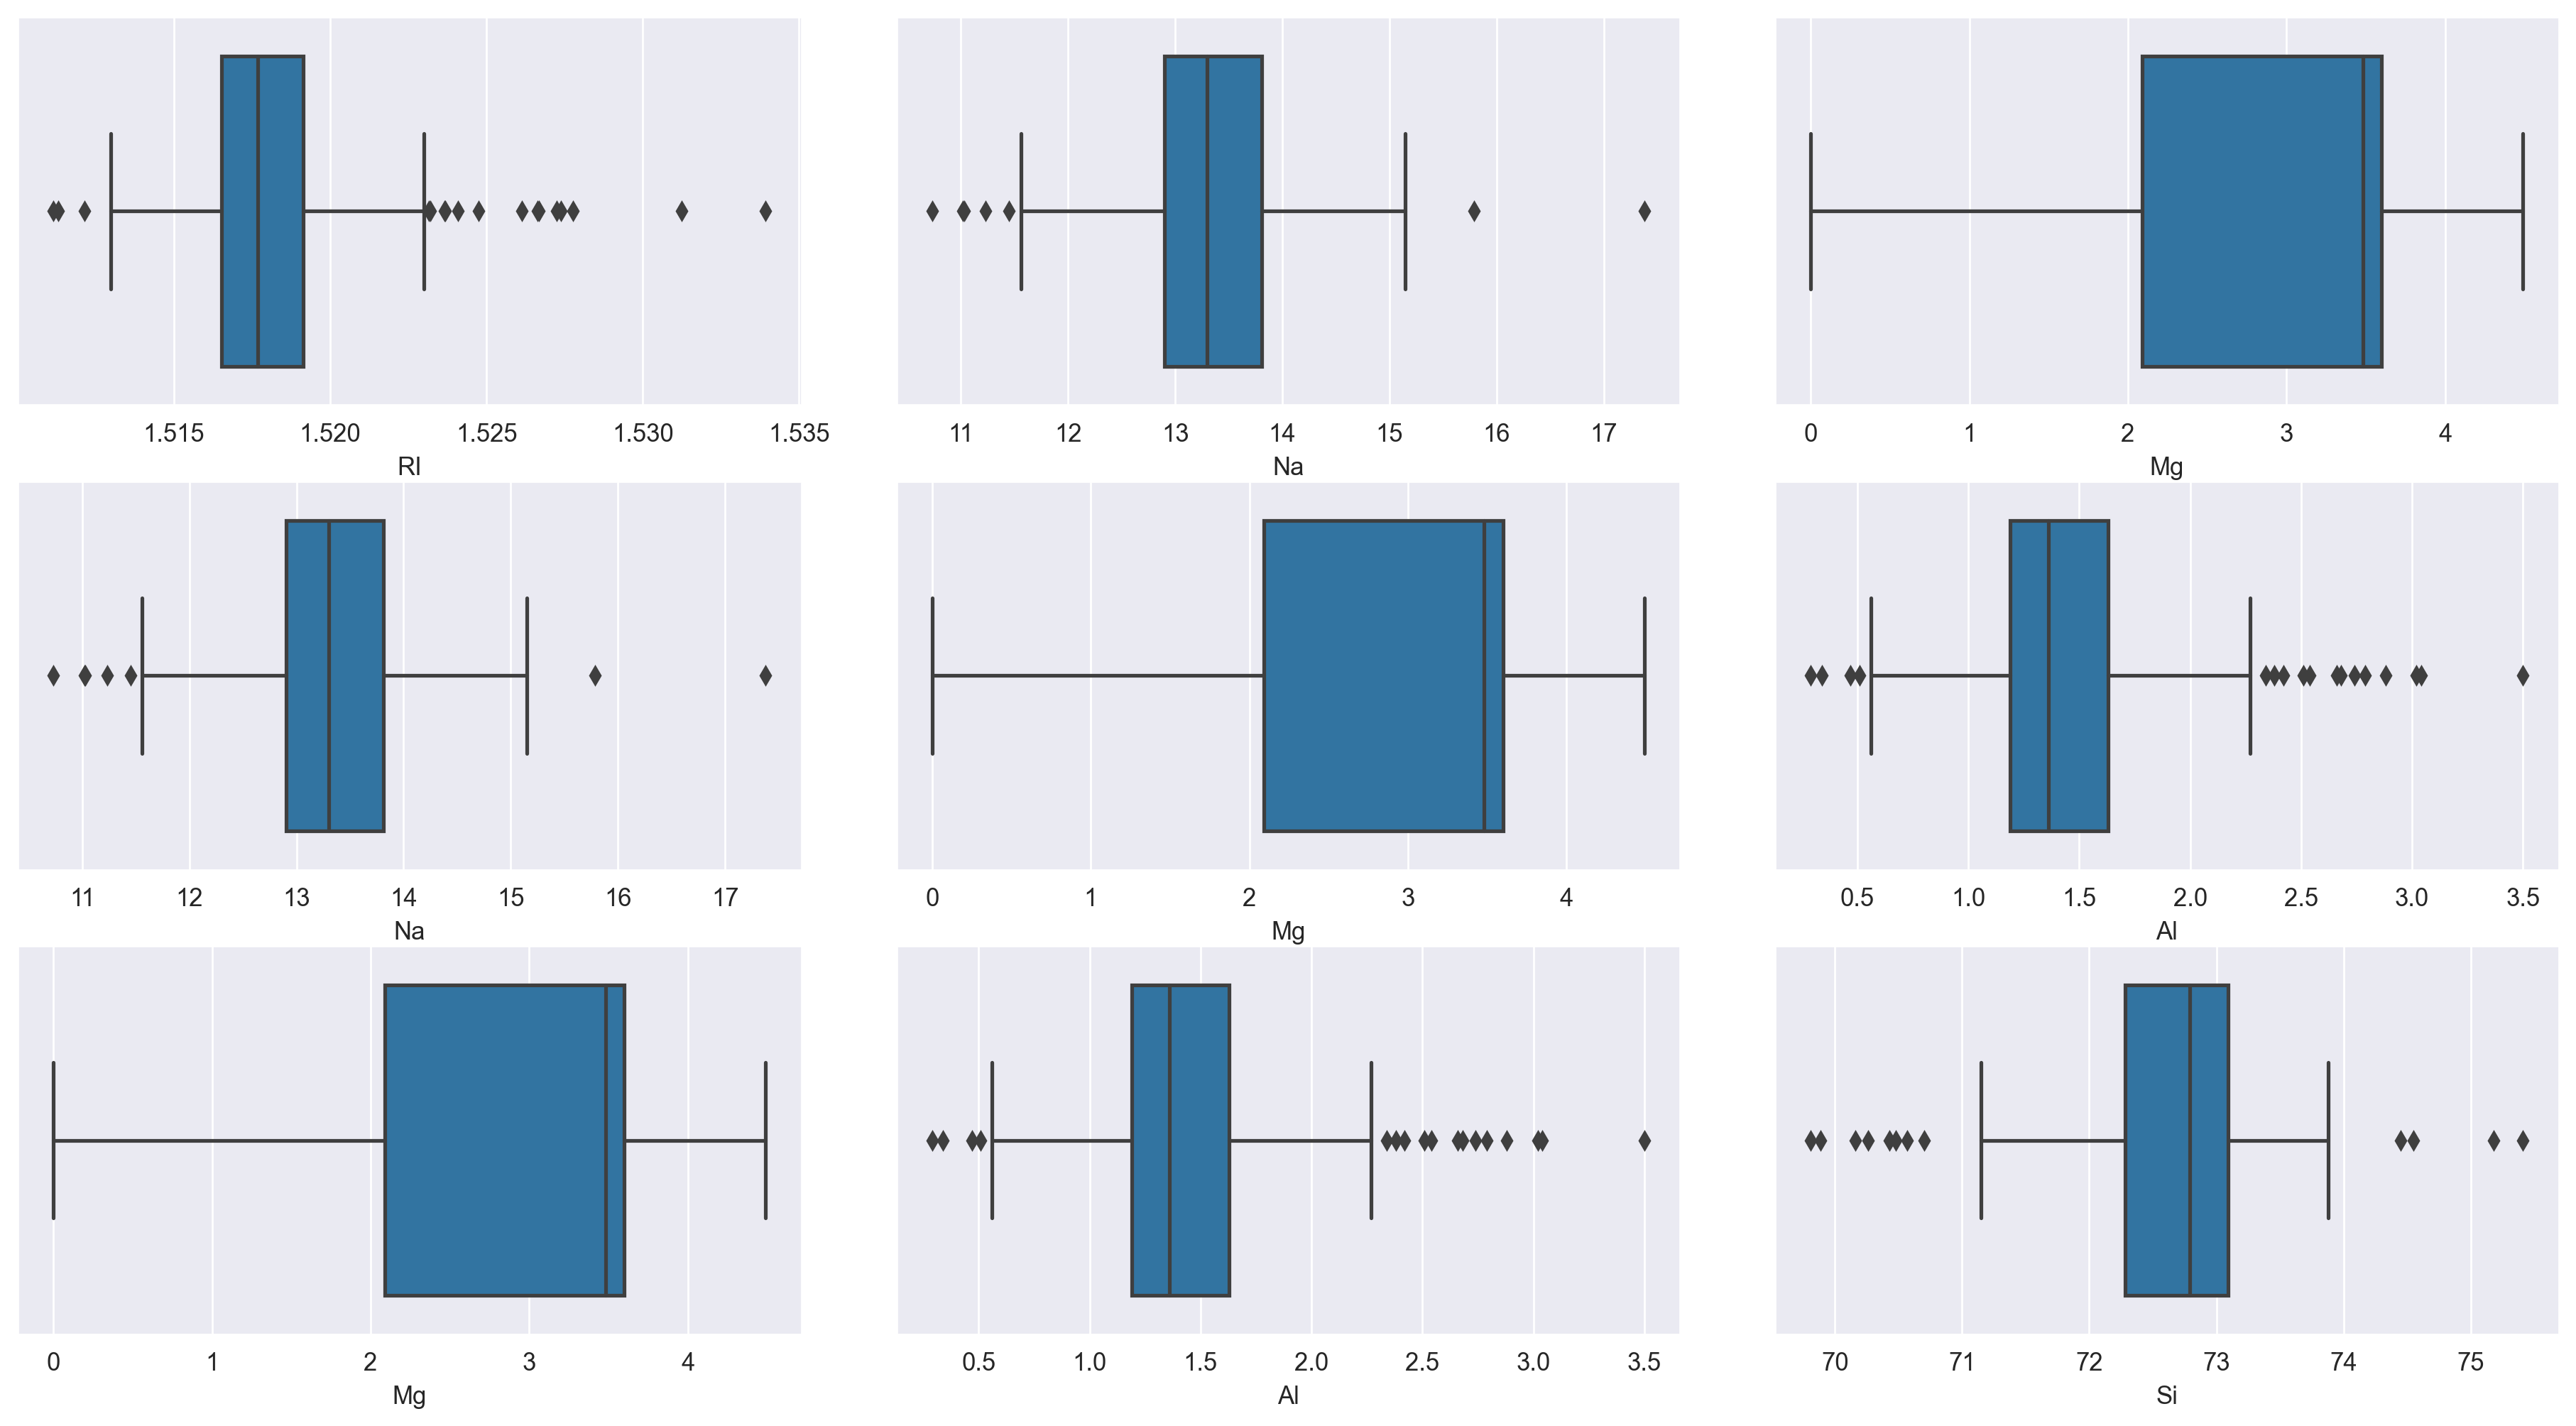

In [23]:
plot_box(gs,3,3)

#### Ploting Histplot

In [25]:
def plot_hist(df,r,c):
    r = int(r)
    c = int(c)
    fig,ax = plt.subplots(r,c)
    plt.tight_layout()

    for i in range(r):
        for j in range(c):
            sns.histplot(df[df.columns[i+j]], ax = ax[i,j])

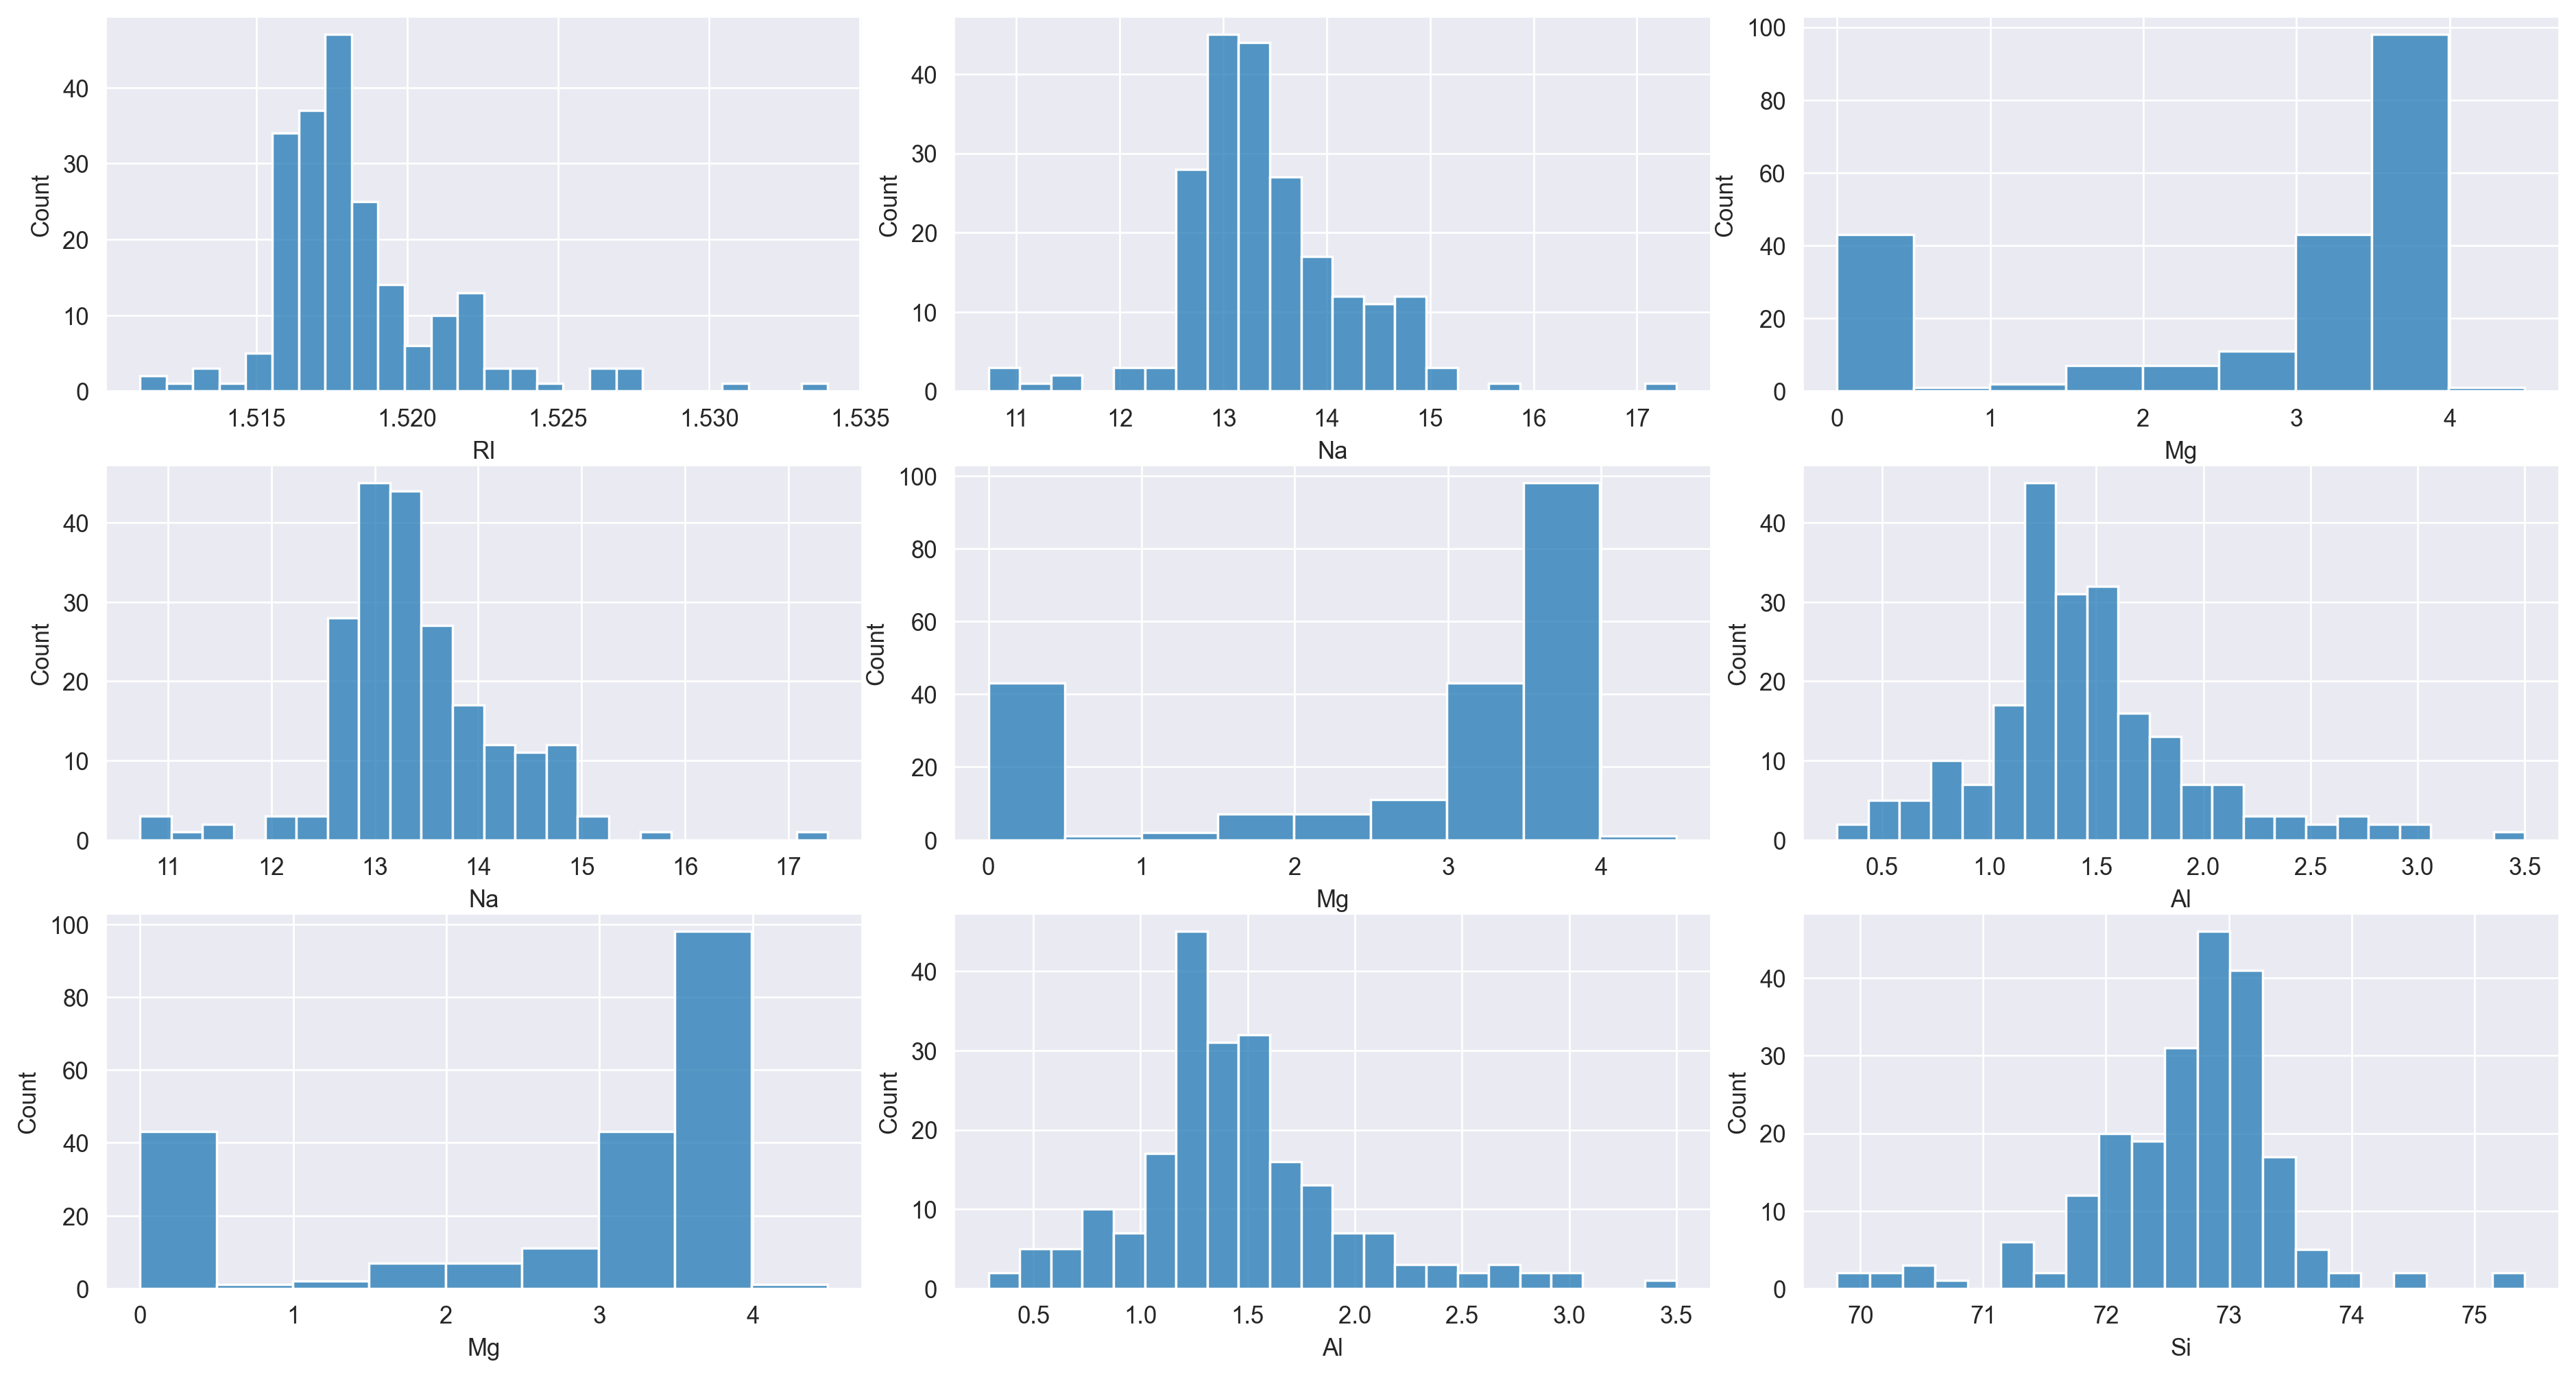

In [26]:
plot_hist(gs,3,3)

#### Ploting QQ-Plot

In [27]:
def plot_qq(df,r,c):
    r = int(r)
    c = int(c)
    fig,ax = plt.subplots(r,c)
    plt.tight_layout()

    for i in range(r):
        for j in range(c):
            sm.qqplot(df[df.columns[i+j]], ax = ax[i,j], line='q')

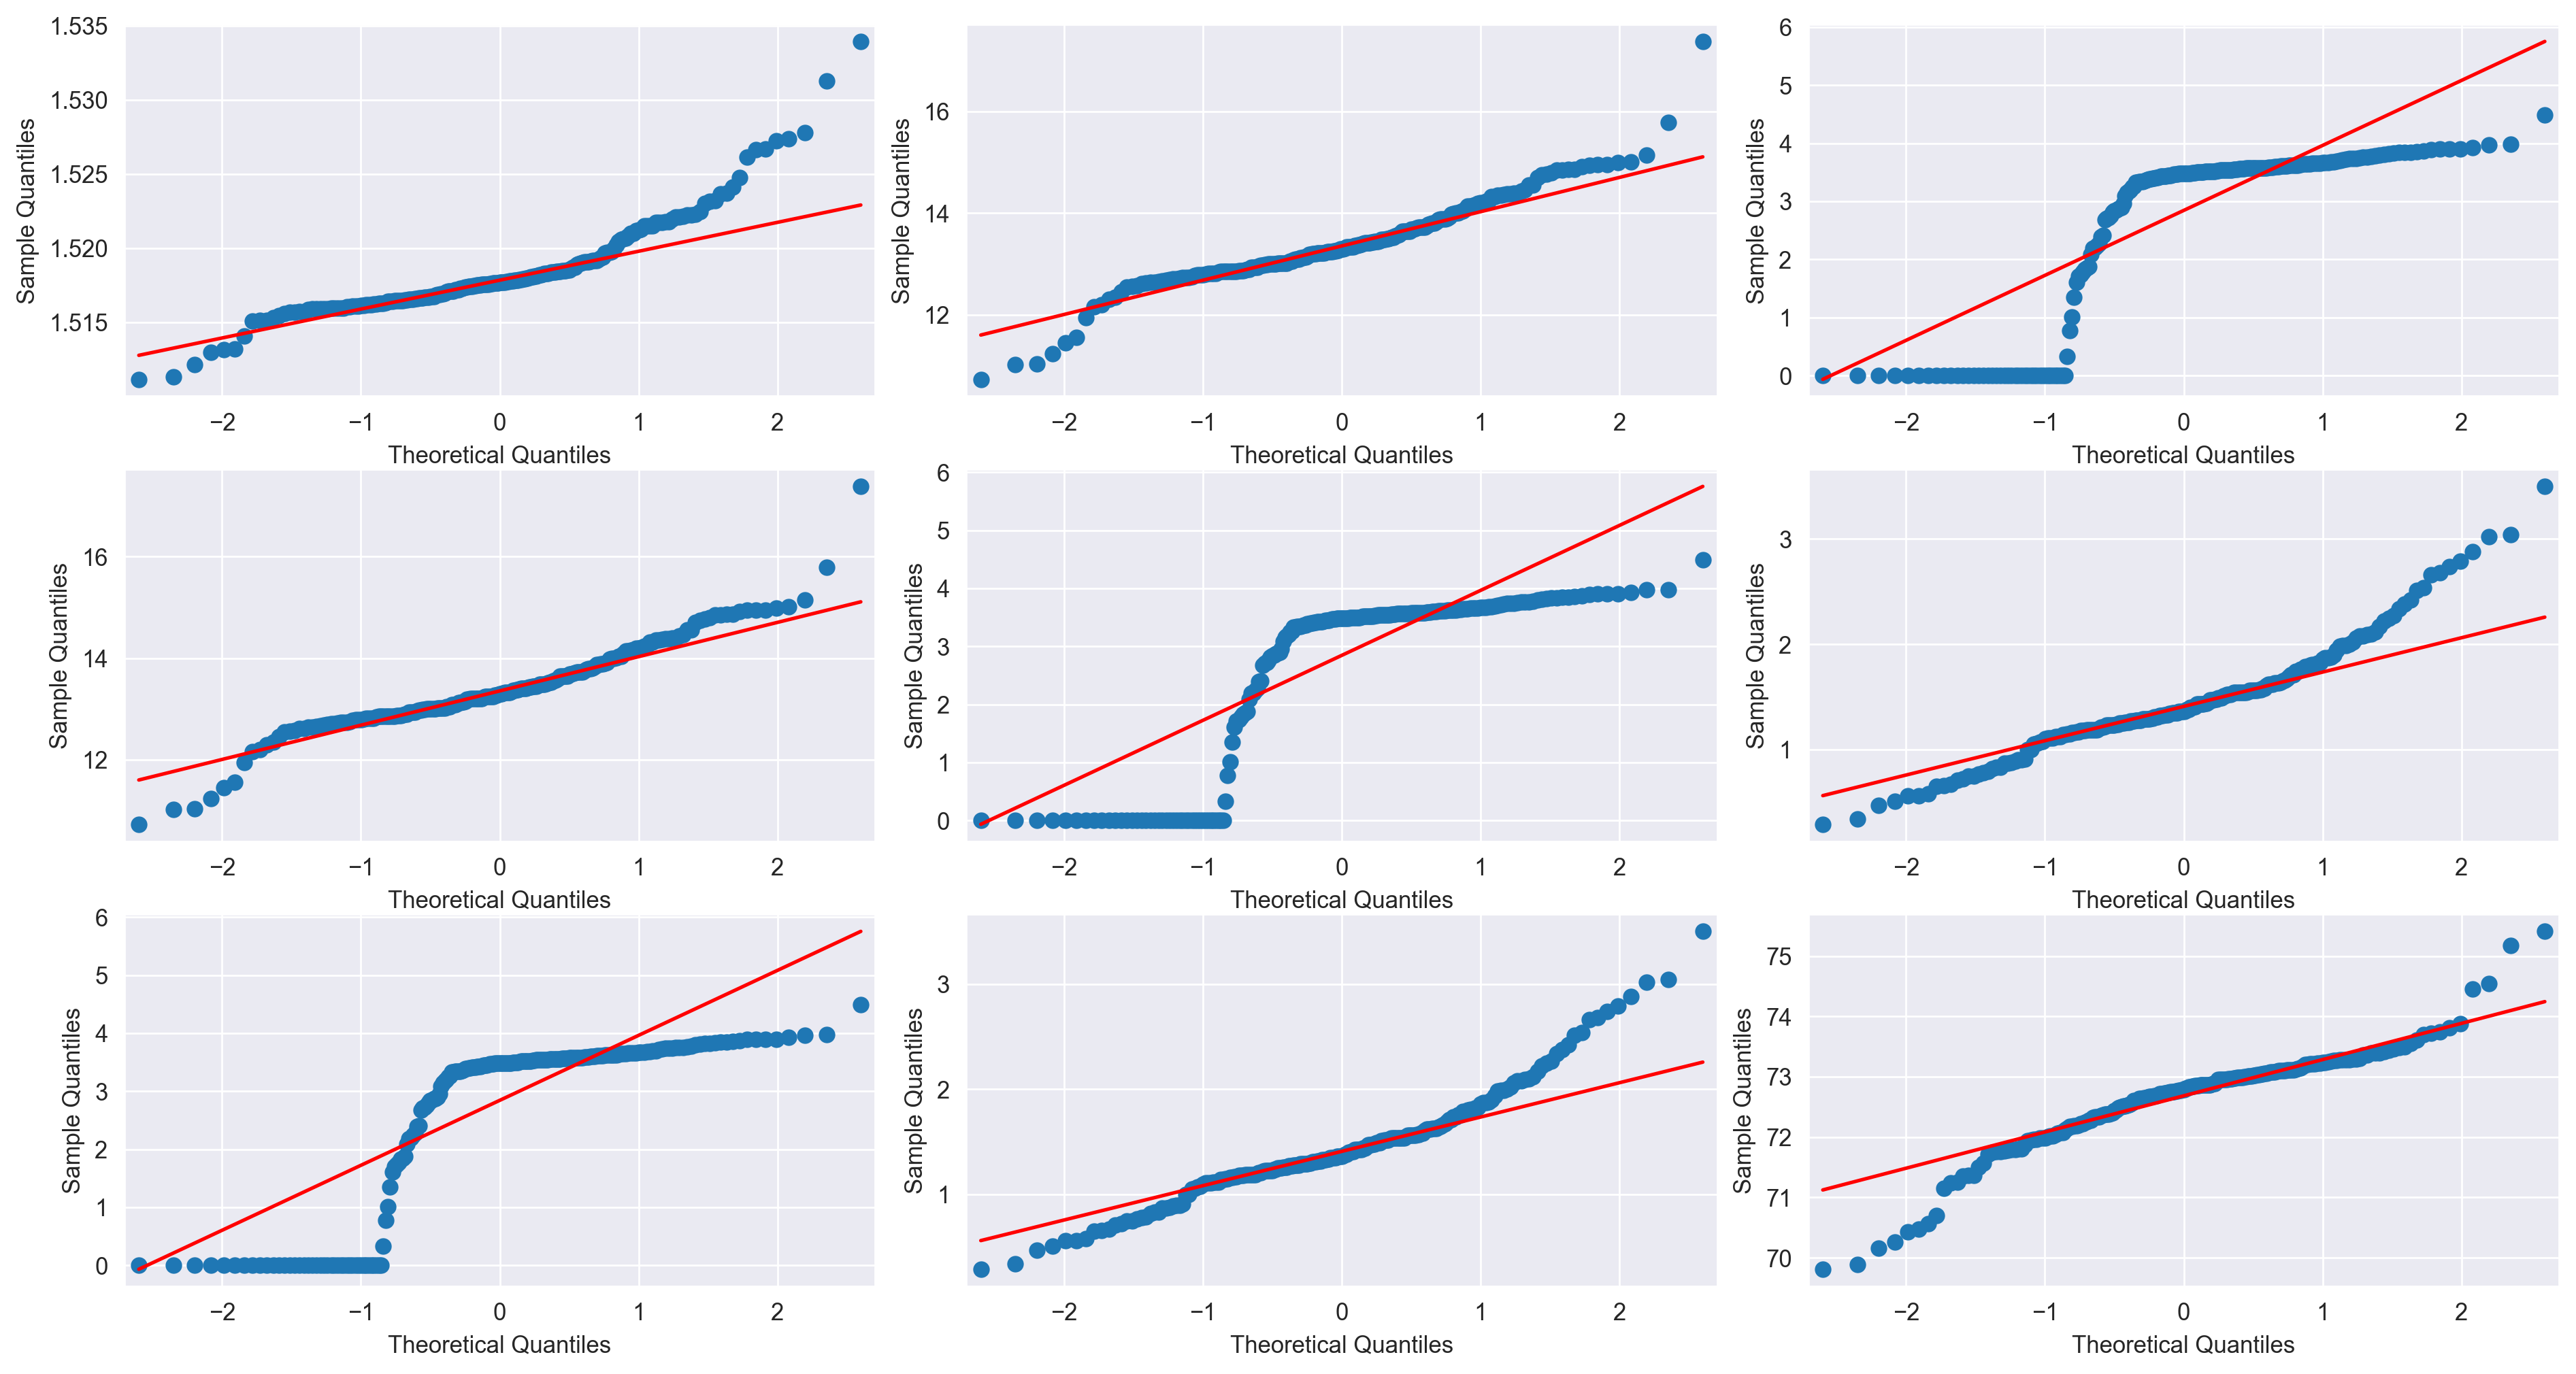

In [28]:
plot_qq(gs,3,3)

### Correlation Analysis

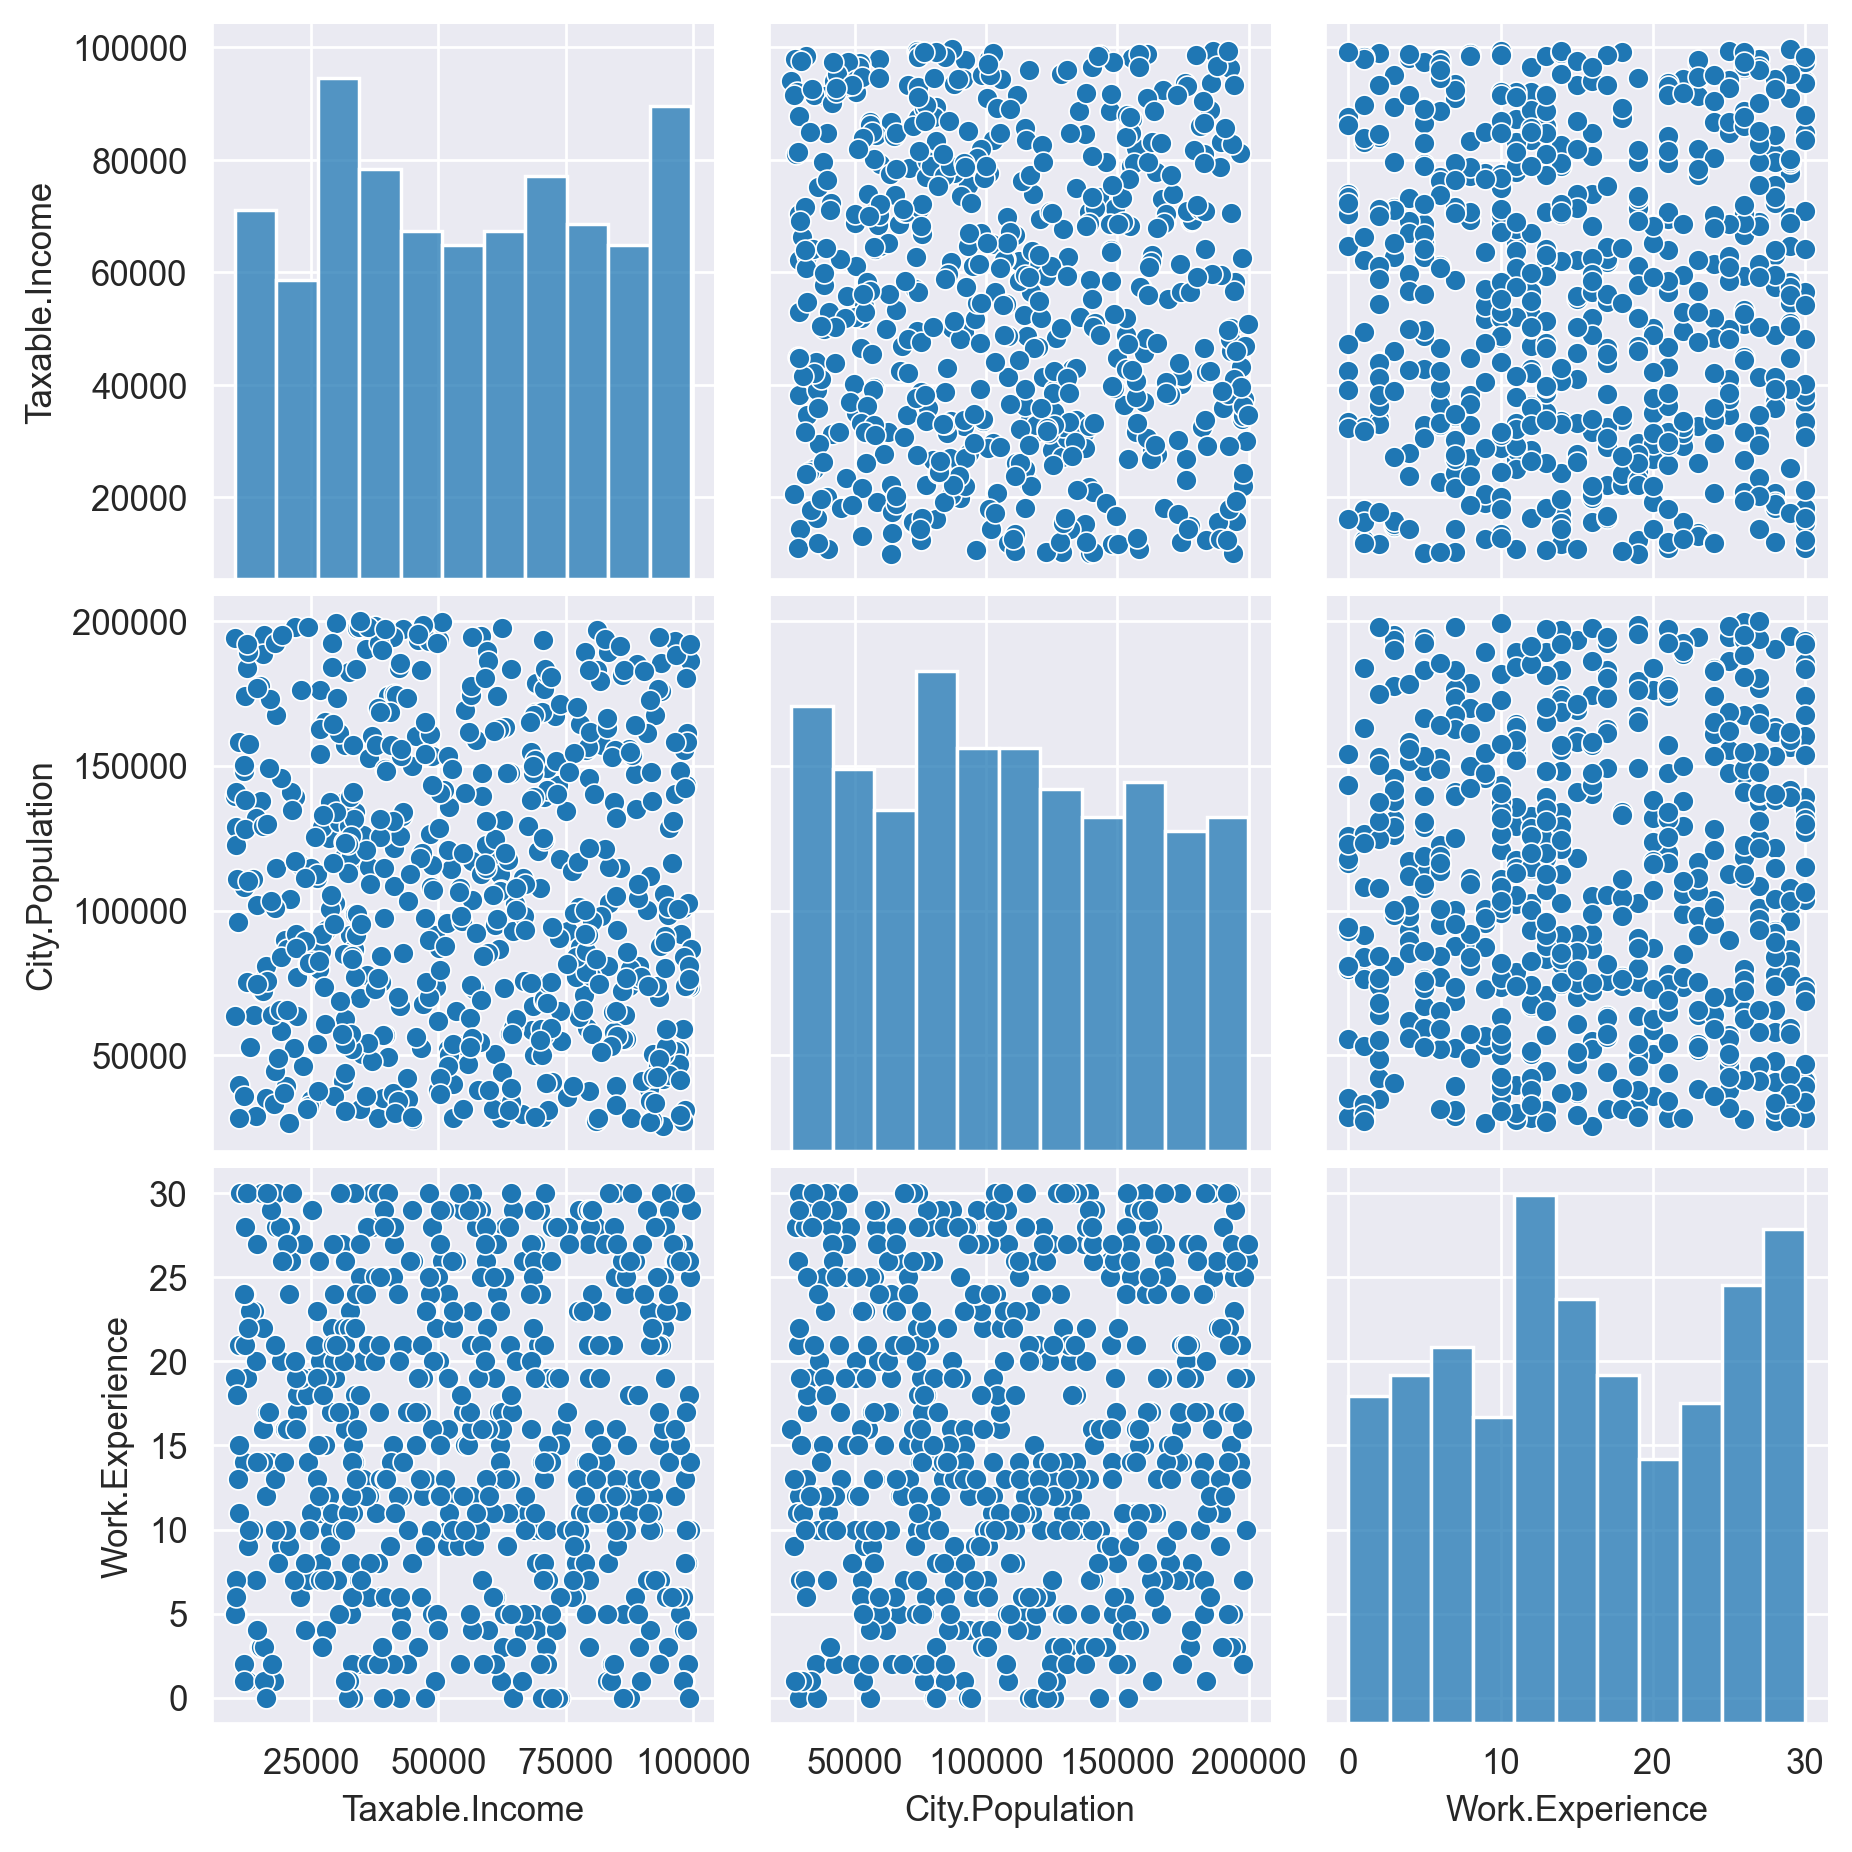

In [ ]:
sns.pairplot(data=gs)

<AxesSubplot:>

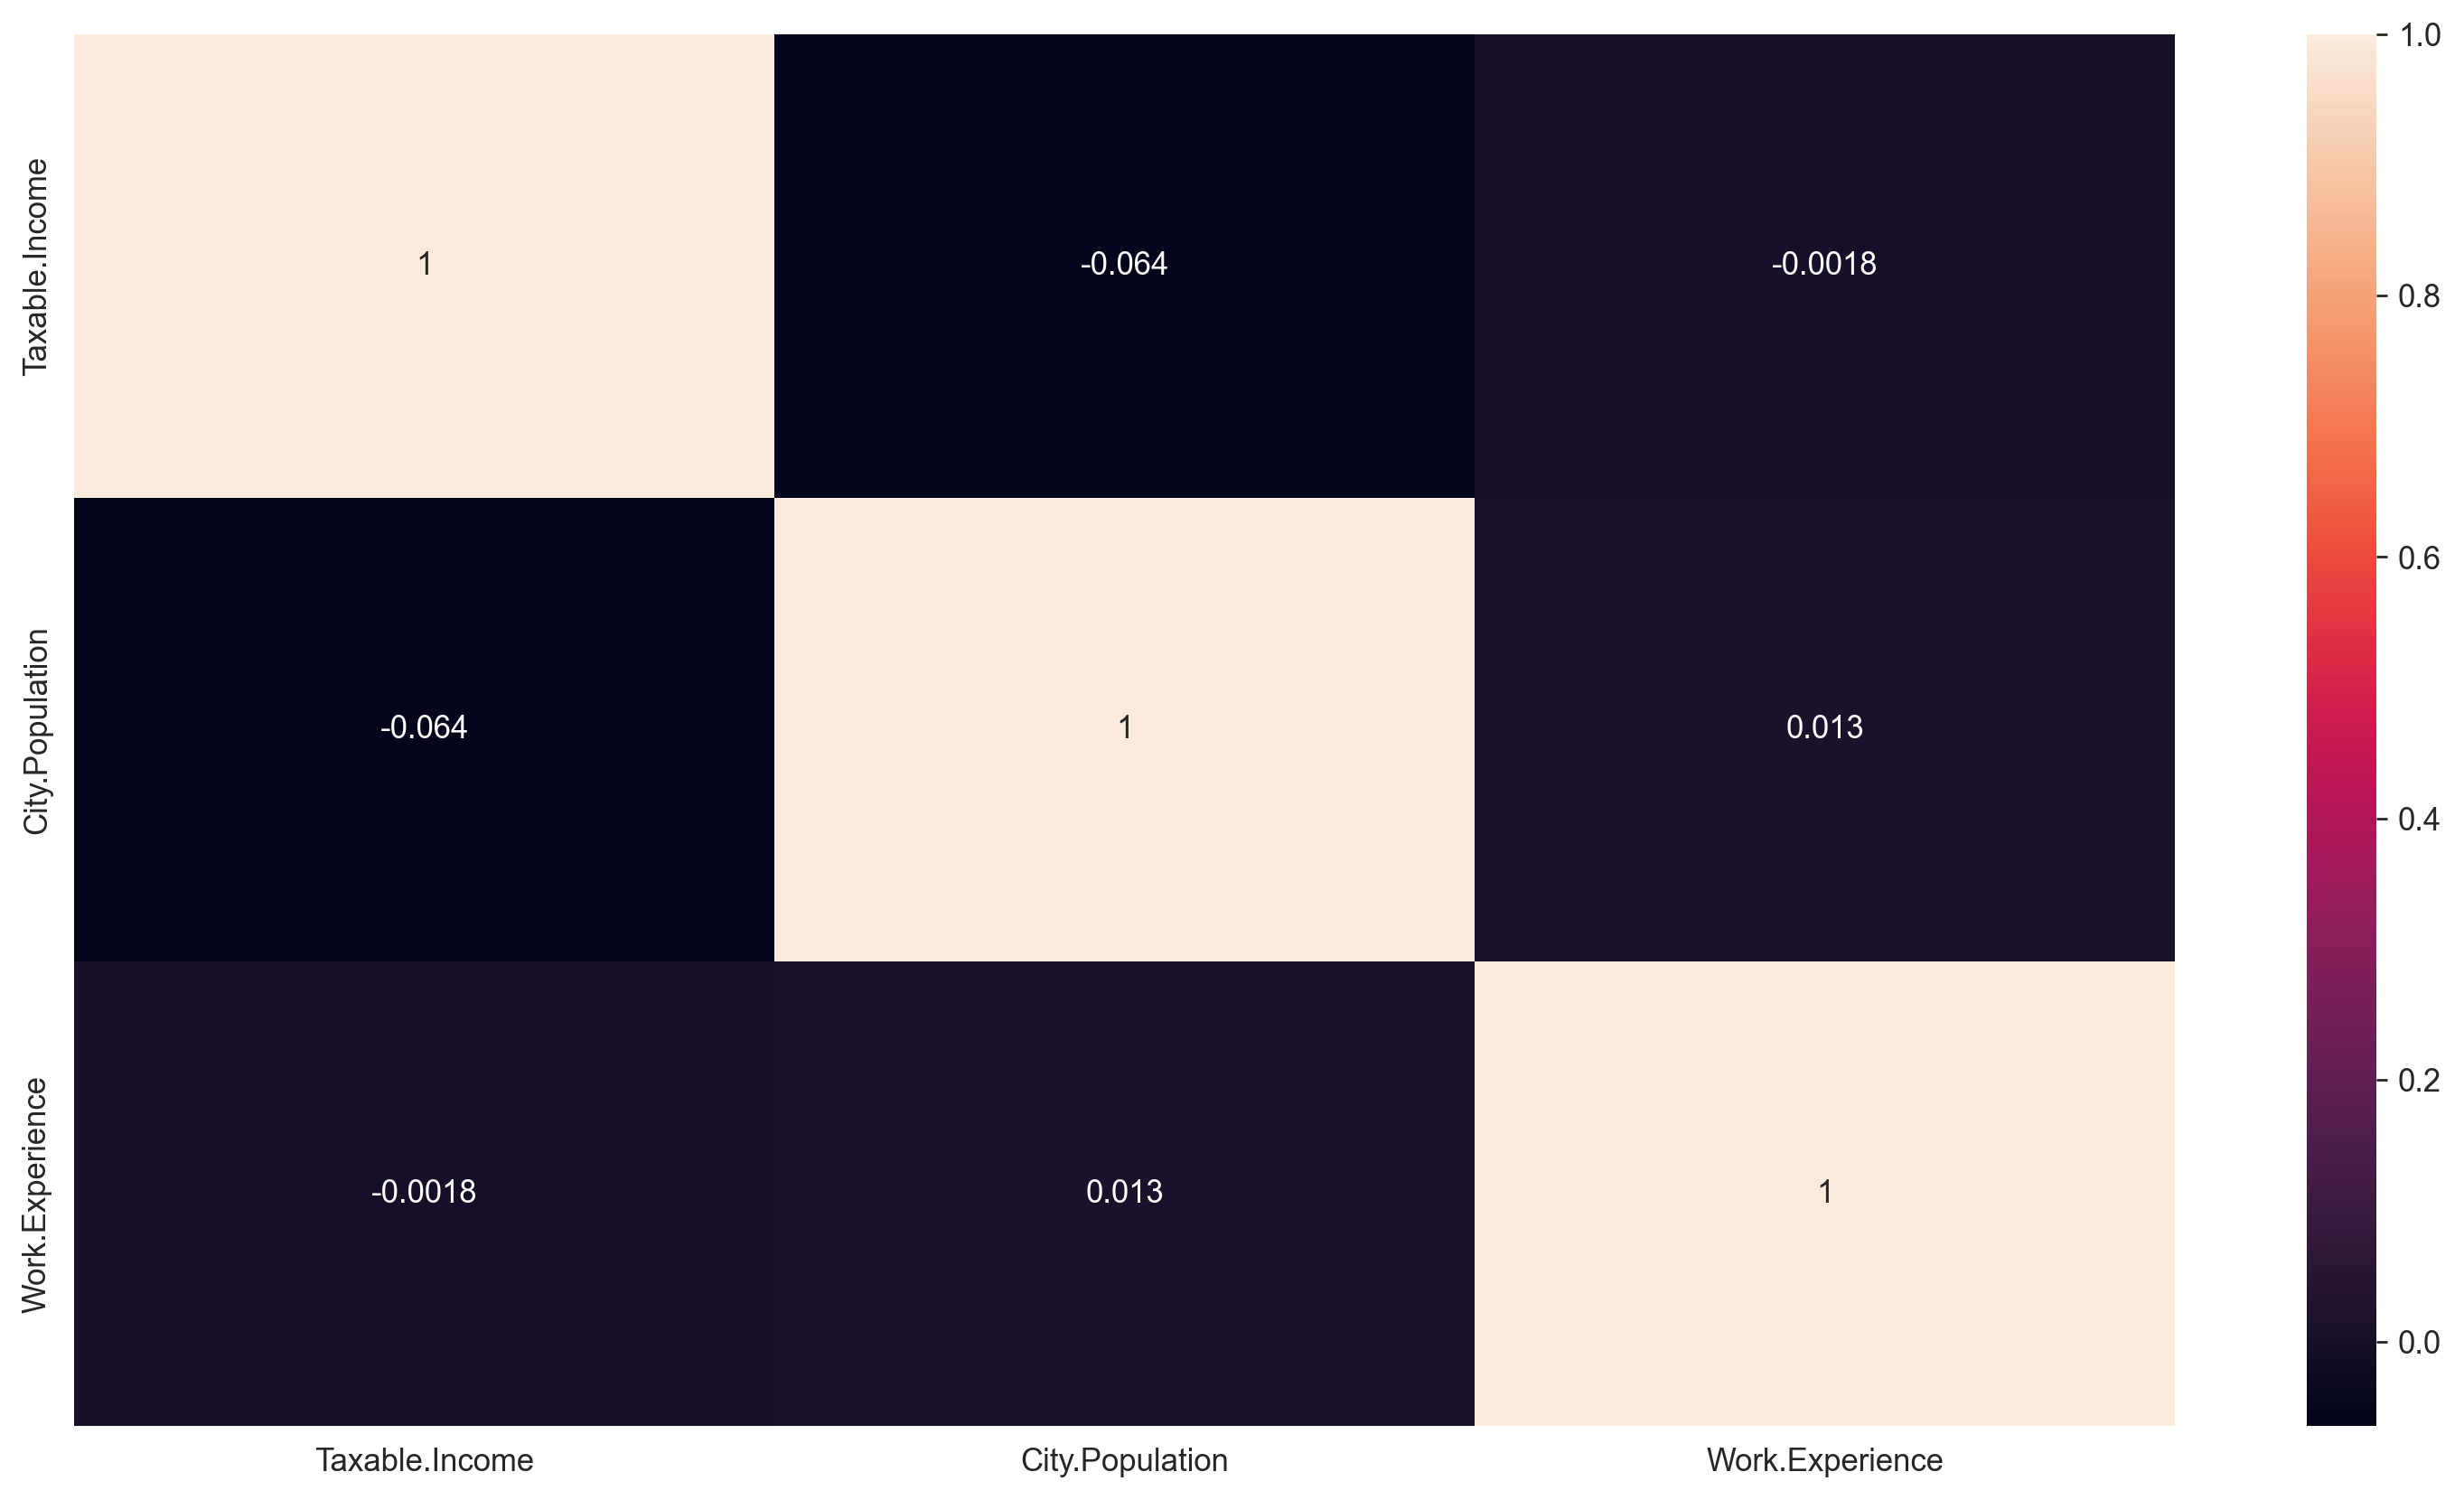

In [ ]:
sns.heatmap(gs.corr(), annot=True)

### Creating Status Column With Given Parameter

- treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
gs['status'] = gs['Taxable.Income'].apply(lambda tax_inc: 'Risky' if tax_inc <= 30000 else 'Good')

gs

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


### Converting Categorical Data to Numerical Data

In [ ]:
le = LabelEncoder()

#### Converting Undergrad Data to Numerical Data

In [ ]:
gs['Undergrad'] = le.fit_transform(gs['Undergrad'])

gs

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,Single,68833,50047,10,YES,Good
1,1,Divorced,33700,134075,18,YES,Good
2,0,Married,36925,160205,30,YES,Good
3,1,Single,50190,193264,15,YES,Good
4,0,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES,Good
596,1,Divorced,69967,55369,2,YES,Good
597,0,Divorced,47334,154058,0,YES,Good
598,1,Married,98592,180083,17,NO,Good


#### Converting Marital Status Data to Numerical Data

In [ ]:
gs['Marital.Status'] = le.fit_transform(gs['Marital.Status'])

gs

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,YES,Good
1,1,0,33700,134075,18,YES,Good
2,0,1,36925,160205,30,YES,Good
3,1,2,50190,193264,15,YES,Good
4,0,1,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,YES,Good
596,1,0,69967,55369,2,YES,Good
597,0,0,47334,154058,0,YES,Good
598,1,1,98592,180083,17,NO,Good


#### Converting Urban Data to Numerical Data

In [ ]:
gs['Urban'] = le.fit_transform(gs['Urban'])

gs

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


#### Converting Status Data to Numerical Data

In [ ]:
gs['status'] = le.fit_transform(gs['status'])

gs

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


### Outlier Detection

In [ ]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [ ]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [ ]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage

In [ ]:
outlier_percentage(gs)

Undergrad : 0.0 %
Marital.Status : 0.0 %
Taxable.Income : 0.0 %
City.Population : 0.0 %
Work.Experience : 0.0 %
Urban : 0.0 %
status : 20.666666666666668 %
